<a href="https://colab.research.google.com/github/MariiaKalinina/BM/blob/main/Pore_pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy.integrate import quad

def hydrostatic_pressure_single(depth, sea_level, sediment_surface, water_depth, rho_water=1040):
    """
    Calculate hydrostatic pressure at a given depth.

    Parameters:
    - depth: The depth at which to calculate hydrostatic pressure (m)
    - sea_level: Elevation of the sea level (m, reference point)
    - sediment_surface: Depth of sediment surface (m)
    - water_depth: Depth of water column above the sediment (m)
    - rho_water: Density of water (kg/m³)

    Returns:
    - Hydrostatic pressure at the given depth (MPa)
    """
    g = 9.81  # Acceleration due to gravity (m/s²)

    pressure = quad(lambda z: rho_water * g, sea_level, depth)[0]

    # Convert pressure to MPa and return
    return pressure / 1e6


def calculate_lithostatic_pressure_single(thickness, rock_density, porosity, rho_water=1000, g=9.81):
    """
    Calculate lithostatic pressure for a single layer.

    Parameters:
        thickness (float): Thickness of the layer (m).
        rock_density (float): Rock density (kg/m³).
        porosity (float): Porosity (fraction).
        rho_water (float): Fluid density (kg/m³). Default is 1000 kg/m³.
        g (float): Gravitational acceleration (m/s²). Default is 9.81 m/s².

    Returns:
        float: Lithostatic pressure for the given layer (Pa).
    """
    return (g * thickness * (rock_density * (1 - porosity) + rho_water * porosity))/1e6


[   0 1000 2000 2002 4000 5000]
5
Calculating pressures for layer: 0
Layer 0: Rock Density = 2700, Porosity = 0.41, Hydrostatic Pressure = 10.202399999999999, Lithostatic Pressure = 19.810314
Calculating pressures for layer: 1
Layer 1: Rock Density = 2720, Porosity = 0.26, Hydrostatic Pressure = 20.404799999999998, Lithostatic Pressure = 42.208506
Calculating pressures for layer: 2
Layer 2: Rock Density = 2970, Porosity = 0.01, Hydrostatic Pressure = 20.425204799999996, Lithostatic Pressure = 42.266398734
Calculating pressures for layer: 3
Layer 3: Rock Density = 2720, Porosity = 0.3, Hydrostatic Pressure = 40.809599999999996, Lithostatic Pressure = 85.700840814
Calculating pressures for layer: 4
Layer 4: Rock Density = 2720, Porosity = 0.1, Hydrostatic Pressure = 51.01199999999999, Lithostatic Pressure = 110.73596081400001


<ipython-input-3-7b0976cd4164>:29: RuntimeWarning: invalid value encountered in log
  'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(-6.2)]),  # Permeability (m^2)


NameError: name 'overpressure' is not defined

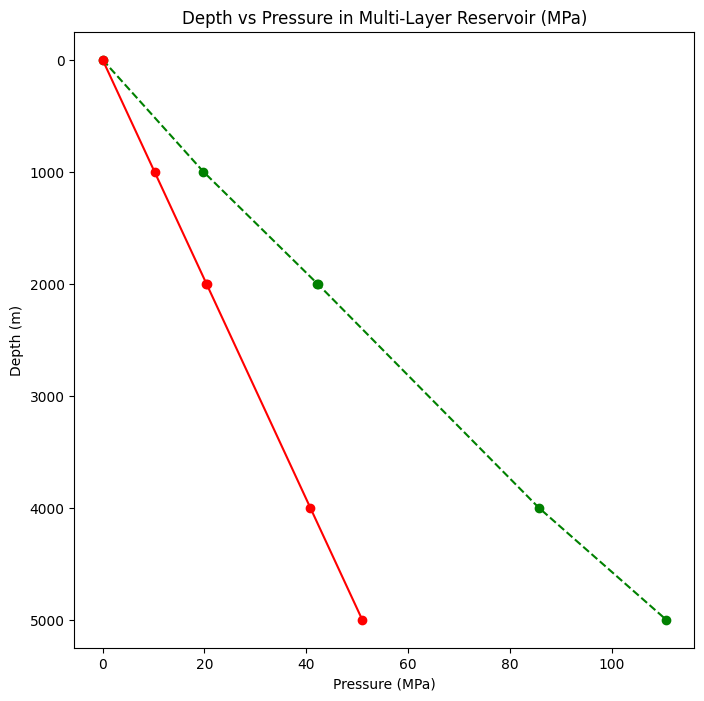

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters
# layer_thicknesses = np.array([1000, 1000, 1000, 1000, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)

print(depths)


# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer

# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1000  # Fluid density (kg/m³)

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
# These are placeholder values and should be replaced with actual data
parameters = {
    'phi': np.array([0.41, 0.26, 0.01, 0.30, 0.1]),  # Porosity
    'k': np.array([np.log(2.26), np.log(3.16), 1e-16, np.log(3.2), np.log(-6.2)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.06, 0.001, 0.051, 0.05]),  # Compressibility (1/Pa)
}


P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
lith_finall = np.zeros(num_layers)
print(num_layers)
depths_new = depths[1::]

SEA_LEVEL = 0
SEDIMENT_SURFACE = 0

if SEDIMENT_SURFACE >=0:
  WATER_DEPTH = SEDIMENT_SURFACE
else:
  WATER_DEPTH = SEA_LEVEL

lith_final = 0  # Start with zero lithostatic pressure at the surface
for i in range(num_layers):
    print('Calculating pressures for layer:', i)

    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(
        depths_new[i],
        sea_level=SEA_LEVEL,
        sediment_surface=SEDIMENT_SURFACE,
        water_depth=WATER_DEPTH,
        rho_water=1040
    )

    # Calculate lithostatic pressure for the current layer
    lith_pres[i] = calculate_lithostatic_pressure_single(
        layer_thicknesses[i],
        rock_densities[i],
        parameters['phi'][i],
        rho_water=1040,
        g=9.81
    )

    # Accumulate lithostatic pressure from previous layers
    lith_final += lith_pres[i]  # Add current layer's lithostatic pressure to the total
    lith_pres[i] = lith_final  # Store the cumulative lithostatic pressure for the current layer

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lith_pres[i] - hydro_pres[i]

    print(f"Layer {i}: Rock Density = {rock_densities[i]}, Porosity = {parameters['phi'][i]}, "
          f"Hydrostatic Pressure = {hydro_pres[i]}, Lithostatic Pressure = {lith_pres[i]}")


# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lith_pres, 0, 0)
hydrostatic_pressure = np.insert(hydro_pres, 0, 0)



# print(lithostatic_pressure, hydrostatic_pressure)

# Plot the depth vs overpressure
plt.figure(figsize=(8, 8
                    ))

# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer

# Annotate each layer with its name
for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    plt.text(overpressure[i+1], depth, name, ha='left', va='center', fontsize=14, color='black')

# Add grid, legend, and show plot
plt.grid(True)
plt.legend(loc='best')
plt.show()

[   0 1000 2000 2002 4000 5000]
5
Calculating pressures for layer: 0
Layer 0: Rock Density = 2700, Porosity = 0.41, Hydrostatic Pressure = 10.202399999999999, Lithostatic Pressure = 19.810314
Calculating pressures for layer: 1
Layer 1: Rock Density = 2720, Porosity = 0.26, Hydrostatic Pressure = 20.404799999999998, Lithostatic Pressure = 42.208506
Calculating pressures for layer: 2
Layer 2: Rock Density = 2970, Porosity = 0.01, Hydrostatic Pressure = 20.425204799999996, Lithostatic Pressure = 42.266398734
Calculating pressures for layer: 3
Layer 3: Rock Density = 2720, Porosity = 0.3, Hydrostatic Pressure = 40.809599999999996, Lithostatic Pressure = 85.700840814
Calculating pressures for layer: 4
Layer 4: Rock Density = 2720, Porosity = 0.1, Hydrostatic Pressure = 51.01199999999999, Lithostatic Pressure = 110.73596081400001
10000
[  0.           9.607914    32.006106    42.24599393  65.31644561
 100.53356081]


<ipython-input-20-abbc32d049c5>:111: RuntimeWarning: overflow encountered in scalar multiply
  dP_dt = (1 - phi / C) * (parameters['P_l'][i] - P[i]) / time_step  # Simplified pressure change rate
<ipython-input-20-abbc32d049c5>:114: RuntimeWarning: overflow encountered in scalar add
  P[i] += dP_dt * time_step


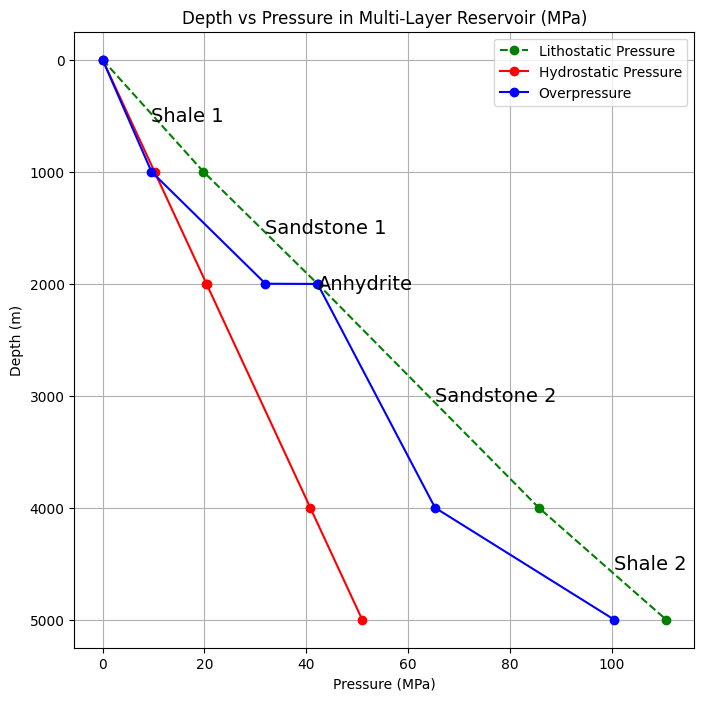

In [20]:

import numpy as np
import matplotlib.pyplot as plt

# Constants (These are placeholders and should be updated with actual values)
layer_thicknesses = np.array([1000, 1000, 2, 1998, 1000])  # Layer thicknesses in meters
# layer_thicknesses = np.array([1000, 1000, 1000, 1000, 1000])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)

print(depths)


# Layer names for each layer
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2', 'Shale 2']

# Rock densities for each layer (kg/m³)
rock_densities = np.array([2700, 2720, 2970, 2720, 2720])  # Rock densities for each layer

# Fluid density (constant across layers, e.g., water or oil)
fluid_density = 1000  # Fluid density (kg/m³)

# Example layer parameters: [porosity, permeability, dynamic viscosity, compressibility]
# These are placeholder values and should be replaced with actual data
parameters = {
    'phi': np.array([0.41, 0.26, 0.01, 0.30, 0.1]),  # Porosity
    'k': np.array([10**-2.26, 10**3.16, 1e-16, 10**3.2, 10**-6.3]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'C': np.array([0.35, 0.06, 0.001, 0.051, 0.055]),  # Compressibility (1/Pa)
}


P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
lith_finall = np.zeros(num_layers)
print(num_layers)
depths_new = depths[1::]

SEA_LEVEL = 0
SEDIMENT_SURFACE = 0

if SEDIMENT_SURFACE >=0:
  WATER_DEPTH = SEDIMENT_SURFACE
else:
  WATER_DEPTH = SEA_LEVEL

lith_final = 0  # Start with zero lithostatic pressure at the surface
for i in range(num_layers):
    print('Calculating pressures for layer:', i)

    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(
        depths_new[i],
        sea_level=SEA_LEVEL,
        sediment_surface=SEDIMENT_SURFACE,
        water_depth=WATER_DEPTH,
        rho_water=1040
    )

    # Calculate lithostatic pressure for the current layer
    lith_pres[i] = calculate_lithostatic_pressure_single(
        layer_thicknesses[i],
        rock_densities[i],
        parameters['phi'][i],
        rho_water=1040,
        g=9.81
    )

    # Accumulate lithostatic pressure from previous layers
    lith_final += lith_pres[i]  # Add current layer's lithostatic pressure to the total
    lith_pres[i] = lith_final  # Store the cumulative lithostatic pressure for the current layer

    # Calculate P_l (difference between lithostatic and hydrostatic pressures)
    P_l[i] = lith_pres[i] - hydro_pres[i]

    print(f"Layer {i}: Rock Density = {rock_densities[i]}, Porosity = {parameters['phi'][i]}, "
          f"Hydrostatic Pressure = {hydro_pres[i]}, Lithostatic Pressure = {lith_pres[i]}")


# Time parameters for pressure calculation (You can adjust these)
time_step = 1e2  # Time step (s)
total_time = 1e6  # Total time (s)
num_steps = int(total_time / time_step)
print(num_steps)

parameters['P_l'] = P_l

# Initialize pressure array
P = np.zeros(num_layers)  # Initial pressure (Pa) for each layer, assuming equilibrium


# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lith_pres, 0, 0)
hydrostatic_pressure = np.insert(hydro_pres, 0, 0)


# Time-stepping loop to update pressure in each layer
for step in range(num_steps):
    # Calculate the pressure change for each layer
    for i in range(num_layers):
        phi = parameters['phi'][i]
        k = parameters['k'][i]
        mu = parameters['mu'][i]
        C = parameters['C'][i]

        # Simplified form of the given equation: ∂P/∂t = (1-φ/C)*∂P_l/∂t
        # For simplicity, we assume ∂P_l/∂t is proportional to the pressure in the layer
        dP_dt = (1 - phi / C) * (parameters['P_l'][i] - P[i]) / time_step  # Simplified pressure change rate

        # Update the pressure in the current layer
        P[i] += dP_dt * time_step

# Calculate the overpressure for each layer at the final time step
overpressure = np.zeros(num_layers + 1)  # Including surface depth (0m) for overpressure

# Function to calculate overpressure as a scalar
def calculate_overpressure(P_l, P_overburden):
    return P_l + P_overburden

# Initialize overpressure array
overpressure = np.zeros(num_layers + 1)  # Including surface depth (0m) for overpressure

for i in range(num_layers):
    # Calculate hydrostatic pressure for each layer
    P_overburden = hydrostatic_pressure_single(depths[i], sea_level=SEA_LEVEL, sediment_surface=SEDIMENT_SURFACE,
                                               water_depth=WATER_DEPTH, rho_water=1040)

    # Ensure the calculate_overpressure function returns a scalar and assign it to overpressure
    overpressure[i+1] = calculate_overpressure(parameters['P_l'][i], P_overburden)

# Convert pressures to MPa (1 MPa = 1e6 Pa)
# overpressure /= 1e6
print(overpressure)


# Plot the depth vs overpressure
plt.figure(figsize=(8, 8))

# Plot lithostatic and hydrostatic pressures for depths from surface (0m) including the surface depth (0m)
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')
plt.plot(overpressure, depths, marker='o', linestyle='-', color='b', label='Overpressure')

plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward

top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths) / 2  # Midpoint depths of each layer

# Annotate each layer with its name
for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    plt.text(overpressure[i+1], depth, name, ha='left', va='center', fontsize=14, color='black')

# Add grid, legend, and show plot
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [14]:
# Conversion factor
seconds_per_year = 31_557_600  # seconds in one year
seconds_in_million_years = seconds_per_year * 1_000_000  # seconds in one million years

def seconds_to_million_years(seconds):
    return seconds / seconds_in_million_years

# Example usage:
seconds = 1e20  # Example: 1 trillion seconds
millions_of_years = seconds_to_million_years(seconds)
print(f"{seconds} seconds is approximately {millions_of_years/1e6} Ma.")


1e+20 seconds is approximately 3.168808781402895 Ma.
